# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Comparing Frequentist and Bayesian Statistical Inference__

<br>

Author:  Tyler J. Brough <br>
Updated: December 1, 2021 <br>

---

<br>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [10, 8]

## __Bayesian Estimation of the Beta-Binomial Model__

In [2]:
class BetaBinomial:
    def __init__(self, alpha = 1, beta = 1):
        self.alpha = alpha
        self.beta = beta
        
    def fit(self, x):
        self.alpha +=  np.sum(x)
        self.beta += len(x) - np.sum(x)
        
    def plot(self):
        x = np.linspace(0, 1, 1000)
        y = stats.beta.pdf(x, self.alpha, self.beta)
        plt.plot(x, y, lw = 2.0, color='darkblue', alpha=0.8)
        plt.fill_between(x, y, facecolor='orange', alpha=0.5)
        plt.title(f"Beta({self.alpha},{self.beta}) Prior Distribution")
        plt.show()
        
    def hdi(self, a=0.05):
        lower = stats.beta(self.alpha, self.beta).ppf(a/2.)
        upper = stats.beta(self.alpha, self.beta).ppf(1. - (a/2.))
        return (lower, upper)

In [15]:
theta = 0.4
N = 100
flips = np.random.binomial(n=1, p=theta, size=N);

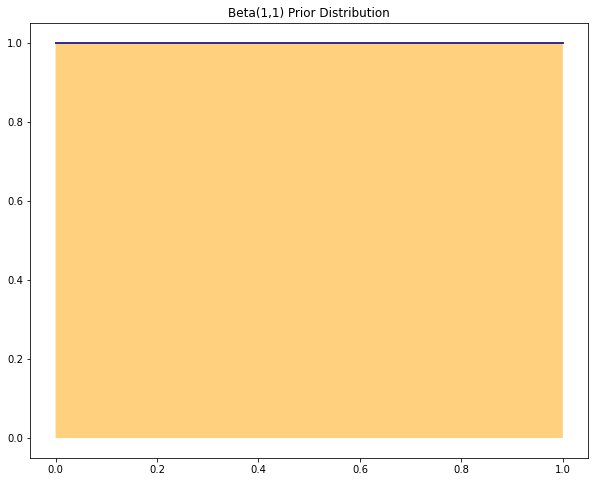

In [4]:
bb = BetaBinomial(alpha=1, beta=1)
bb.plot()

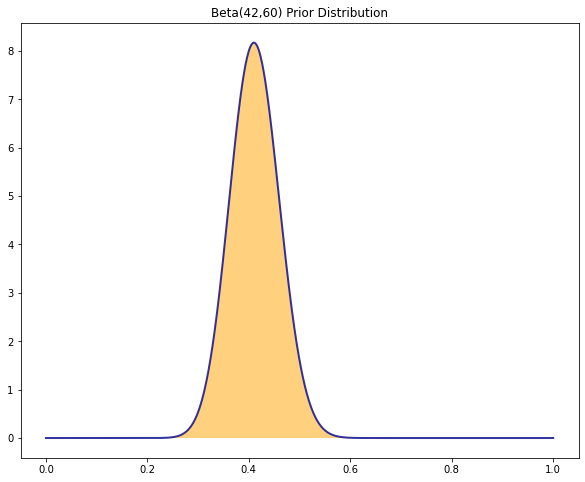

In [5]:
bb.fit(flips)
bb.plot()

In [6]:
bb.hdi()

(0.31856964076032923, 0.5082384277228418)

In [7]:
bb.hdi(a=0.1)

(0.3329471871720783, 0.492559590975166)

In [ ]:
bb.hdi(a=0.01)

In [ ]:
a, b = bb.alpha, bb.beta

In [ ]:
stats.beta(a, b).cdf(0.6) - stats.beta(a, b).cdf(0.2) 

<br>
<br>

## __Maximum Likelihood Estimation of the Binomial Model (Frequentist)__

In [16]:
N = len(flips)
xbar = flips.mean()
se = np.std(flips, ddof=1) / np.sqrt(N)
(xbar, se)

(0.41, 0.04943110704237103)

In [19]:
## 95% CI
alpha = 0.05
lq = stats.t(N-1).ppf(alpha/2.)
uq = stats.t(N-1).ppf(1. - (alpha/2.))
(xbar + lq*se, xbar + uq*se)

(0.31191795947468715, 0.5080820405253128)

In [20]:
## 90% CI
alpha = 0.1
lq = stats.t(N-1).ppf(alpha/2.)
uq = stats.t(N-1).ppf(1. - (alpha/2.))
(xbar + lq*se, xbar + uq*se)

(0.3279250270357362, 0.49207497296426367)

In [22]:
## 99% CI
alpha = 0.01
lq = stats.t(N-1).ppf(alpha/2.)
uq = stats.t(N-1).ppf(1. - (alpha/2.))
(xbar + lq*se, xbar + uq*se)

(0.2801738707487565, 0.5398261292512434)

## __Bootstrap Analysis of the Binomial Model__

In [23]:
N = len(flips)
B = 10_000
bbar = np.zeros(B)

for b in range(B):
    boot_flips = np.random.choice(flips, size=N, replace=True)
    bbar[b] = np.mean(boot_flips)

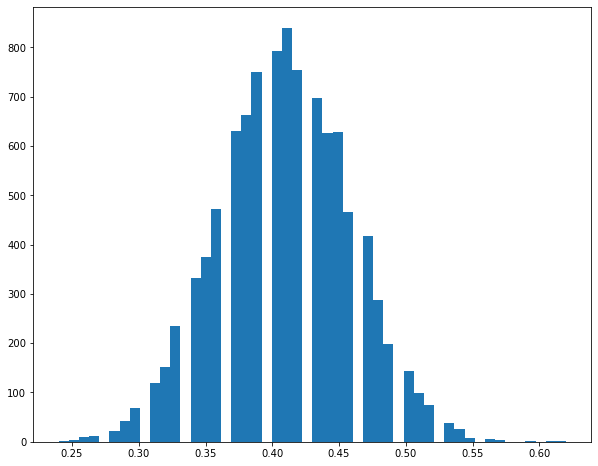

In [31]:
plt.hist(bbar, bins=50);

In [33]:
bbar.sort()

In [36]:
## 95% Bootstrap CI
alpha = 0.05
lo = int(B * (alpha / 2.))
hi = int(B * (1. - (alpha / 2.)))

In [39]:
lo, hi

(250, 9750)

In [ ]:
(bbar[lo], bbar[hi])

In [41]:
## 90% Bootstrap CI
alpha = 0.1
lo = int(B * (alpha / 2.))
hi = int(B * (1. - (alpha / 2.)))

In [42]:
lo, hi

(500, 9500)

In [43]:
(bbar[lo], bbar[hi])

(0.33, 0.49)

In [44]:
## 99% Bootstrap CI
alpha = 0.01
lo = int(B * (alpha / 2.))
hi = int(B * (1. - (alpha / 2.)))

In [45]:
lo, hi

(50, 9950)

In [46]:
(bbar[lo], bbar[hi])

(0.29, 0.53)